# Support Vector Regression

<font size = 3> Support Vector Regression ist eine Methode um Zusammenhänge in Daten zu erkennen.
Aus diesen Zusammenhängen lassen sich dann Schlüsse auf neue unbekannte Daten ziehen und so eine Vorhersage machen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

### Daten einlesen
<font size = 3> Folgend kann eine Kernelfunktion eingegeben werden.
Je nach Trainingswunsch können alle Attribute zum Training genutzt werden oder nur die Attribute die eine Korrelation von min. 0.2 haben.

In [2]:
# Aus wahl einer Kernelfunktion 'linear', 'poly' oder 'rbf'
kernel = 'linear'

# Datensatz und Spaltenanzahl für das Training mit allen Attributen
#df_studierende = pd.read_csv("df_studierende_complete.csv", sep = ";")
#cols = 30 

# Datensatz und Spaltenanzahl für das Training mit ausgewählten Daten (Korrelation > 0.2)
df_studierende = pd.read_csv("df_studierende.csv", sep = ";") 
cols = 7 

#nur zum testen der Kernels
#cols = 5 # testen für nur ein Attribut 

### Daten vorbereiten
<font size = 3>Zuerst müssen die vorhandenen Daten in die Attribute und in die Labels aufgeteilt werden.
Danach müssen die Daten noch in Trainings und Testdaten unterteilt werden.

In [3]:
def data_prep(df, cols):
    '''
    Aufteilen der Daten in Trainings und Testdaten.
    
    Parameters
    ----------
    df : DataFrame
        Ausgangs Dataframe mit allen vorhandenen Daten.
    cols : Int
        Gibt an bis zu welcher Spalte die Daten mit aufgenommen werden.
        So kann entschieden werden, ob beim Training alle Attribute oder 
        nur Attribute mit einer Korrelation von 0.2 mit einbezogen werden.

    Returns
    -------
    x_train, x_test, y_train, y_test : Array
        Trainings und Testdaten in Attribute (x) und Zielvariable aufgeteilt (y).
    '''
    
    if cols == 5:
        start = 4
    else:
        start = 0
    
    # Aufspalten der Daten in Attribute und Zielvariable
    x, y = df.values[:, start:cols],df.values[:,-1]
    x= df.values[:, start:cols]
    y =df.values[:,-1]
    
    #Aufteilen der Daten in Trainings und Testdaten
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 3)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = data_prep(df_studierende, cols)

### Skalierung der Daten

In [4]:
def transform_data(x, y):
    '''
    Skalieren der Daten zur besseren Verarbeitung.
    Muss aber nicht unbedingt gemacht werden.
    '''
    
    #Skalierer festlegen
    sc_x=StandardScaler()
    sc_y=StandardScaler()
    
    y = y.reshape(len(y),1)
    
    #Sklalierung der Daten mit dem vorher festgelegten Skalierer
    x=sc_x.fit_transform(x)
    y=sc_y.fit_transform(y)
    
    return x, y, sc_x, sc_y
x_train, y_train, sc_x, sc_y = transform_data(x_train, y_train)

### Model Aufstellen und mit den Daten trainieren

In [5]:
def supvec_model_fit(x,y, kernel):
    '''
    Trainieren der Suport Vector Regression.
    
    Parameters
    ----------
    x : Trainingsdaten (Attribute)
        
    y : Trainingsdaten (Label bzw. Zielwert)
    
    kernel : gewählte Kernelfunktion

    Returns
    -------
    model : Trainiertes model mit entsprechender Kernelfunktion.
    '''
    
    # Aufstellen des models
    model    = SVR(kernel=kernel, degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=True, max_iter=- 1)
    y = y.reshape(len(y))
    
    #Training 
    model.fit(x,y)
    
    return model

model = supvec_model_fit(x_train,y_train,kernel)


[LibSVM]

### Trainiertes Model mit Testdaten testen

In [6]:
def pred_vec(model, x_test, sc_x, sc_y):
    '''
    Vorhersage mit Testdaten.
    Daten müssen jedoch wieder zurück skaliert werden.
    
    Parameters
    ----------
    x_test : Testdaten (Attribute)
        
    model : Trainiertes Model
    
    sc_x,sc_y : Skalierer

    Returns
    -------
    y_pred : Vorhersage für x_test
    '''
    # Vorhersage für Testdaten
    y_pred = model.predict(sc_x.transform(x_test))
      
    # Zurückskalieren der Daten
    y_pred = sc_y.inverse_transform(y_pred)
    
    return y_pred

y_pred = pred_vec(model,x_test, sc_x, sc_y)

### Berechnung des Fehlers bei der Vorhersage für x_test

In [7]:
def MSE(y_test, y_pred):
    '''
    Berechnung des durchschnittlichen Quadratischen Fehlers von y_pred zu y_test.
    '''
    print(f'Der durchschnittliche Quadratische Fehler ist: {mean_squared_error(y_test, y_pred)}')
    MSE = mean_squared_error(y_test, y_pred)
    
    return MSE
MSE = MSE(y_test, y_pred)

Der durchschnittliche Quadratische Fehler ist: 6.8347314986346595


### Visuelle Darstellung der Ergebnisse

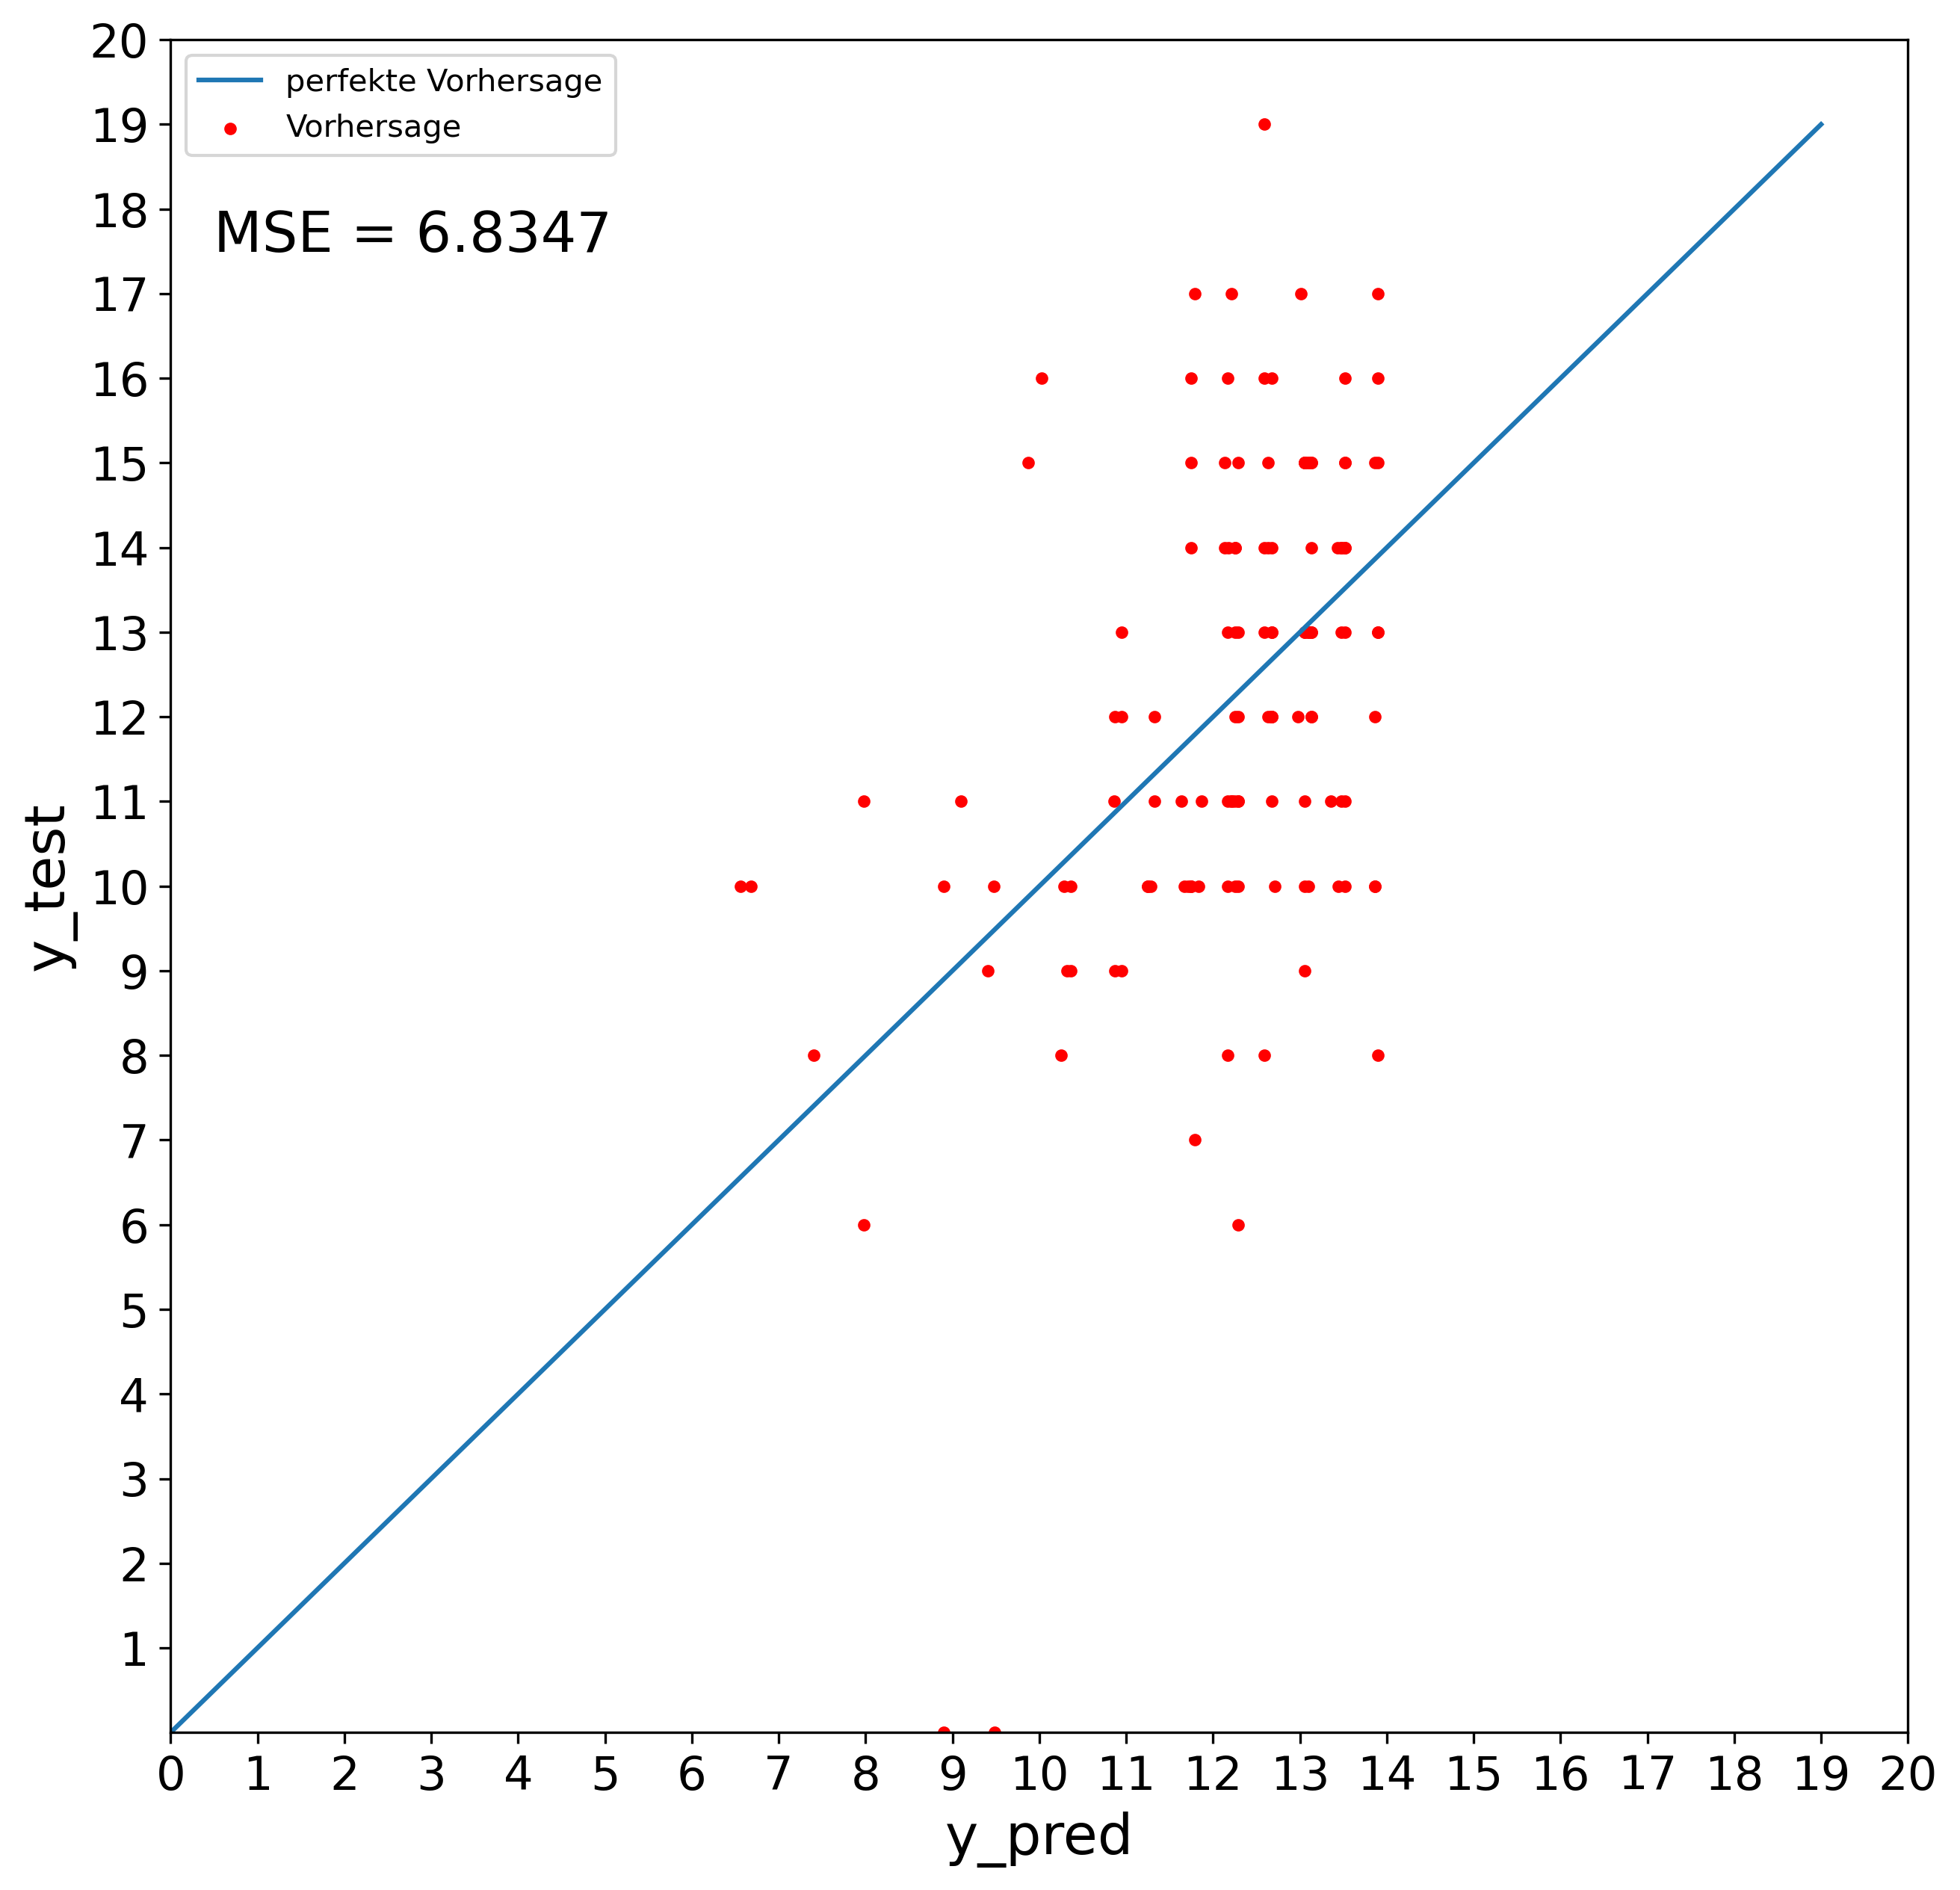

In [8]:
def plot(y_pred,y_test, model, MSE):
    '''
    Plotten der Ergebnisse y_pred
    '''
     
    ticks = [i for i in range(0,20+1)]

    plt.figure(dpi=300, figsize=(10,10))
    #plt.title('SVR - linear, mit ausgewählten Attributen', fontsize = 18)
    plt.plot(range(20),range(20))
    
    plt.text(0.5,17.5,'MSE = '+ str(round(MSE,4)), fontsize = 18)
    
    plt.scatter(y_pred, y_test, marker ='.', color = 'r')
    
    plt.legend(['perfekte Vorhersage','Vorhersage'])
    
    plt.xlabel('y_pred',fontsize=18)
    plt.xticks(ticks,fontsize=15)
    
    plt.ylabel('y_test',fontsize=18)
    plt.yticks(ticks,fontsize=15)
    
    plt.ylim(0.001,20)
    plt.xlim(0,20)
    
    plt.show()

    return
plot(y_pred,y_test, model, MSE)

In [9]:
#nur Attribute mit höchster Korrelation
# Wurde nur zum testen der Kernelfunktionen genutzt
if cols == 5:
    def eval_plot(model, sc_x, sc_y, x_test,y_test,y_pred, kernel):
        eval_poly = np.arange(0,3,0.01)
        eval_poly = eval_poly.reshape(len(eval_poly),1)
        pred =model.predict(sc_x.transform(eval_poly))
        pred = sc_y.inverse_transform(pred)
        
        
    
        plt.figure(dpi = 300)
        plt.title(kernel + ' - kernel', fontsize = 20)
        plt.xlabel('failures',fontsize=18)
        plt.ylabel('finale score',fontsize=18)
    
        plt.plot(x_test,y_test, '.r')
        plt.plot(eval_poly, pred)
        plt.legend(['data','prediction'], fontsize = 20)
        plt.show()
        return
    eval_plot(model, sc_x, sc_y,x_test,y_test,y_pred, kernel)

### Definieren der Interacts

In [10]:
style = {'description_width': 'initial'}
school = widgets.Dropdown(
    options=[('Gabriela Pereira School', 0), ('Mousinho da Silveira', 1)],
    description='Auf welche Schule gehen Sie?',
    style =style,
    layout = Layout(width='50%')
)

Medu = widgets.Dropdown(
    options=[('keine', 0), ('Grundschule', 1), ('Mittlere Reife', 2), ('Abitur', 3), ('höhere Ausbildung', 4)],
    description='Welchen Ausbildungsgrad hat Ihre Mutter?',
    style =style,
    layout = Layout(width='50%')
)

Fedu = widgets.Dropdown(
    options=[('keine', 0), ('Grundschule', 1), ('Mittlere Reife', 2), ('Abitur', 3), ('höhere Ausbildung', 4)],
    description='Welchen Ausbildungsgrad hat Ihr Vater?',
    style =style,
    layout = Layout(width='50%')
)

studytime = widgets.Dropdown(
    options=[('weniger als 2 Stunden', 1), ('2 bis 5 Stunden', 2), ('5 bis 10 Stunden', 3), ('mehr als 10 Stunden', 4)],
    description='Wieviel lernen Sie im Schnitt in der Woche?',
    style =style,
    layout = Layout(width='50%')
)

failures = widgets.Dropdown(
    options=[('0', 0), ('1', 1), ('2', 2), ('3', 3), ('>4', 4)],
    description='Wie oft sind Sie bereits durch den Kurs durchgefallen?',
    style =style,
    layout = Layout(width='50%')
)

higher = widgets.Dropdown(
    options=[('Ja', 1), ('Nein', 2)],
    description='Streben Sie eine höhere Ausbildung an?',
    style =style,
    layout = Layout(width='50%')
)

Dalc = widgets.Dropdown(
    options=[('sehr wenig', 1), ('wenig', 2), ('normal', 3), ('viel', 4), ('sehr viel', 5)],
    description='Täglicher Alkoholkonsum:',
    style =style,
    layout = Layout(width='50%')
)


### Interaktive Eingabe für einen Nutzer
<font size = 3> Dabei werden alle Angaben zu einer Liste zusammengefügt und als x Daten genutzt um eine Vorhersage zu machen.

In [11]:
def data_pred(school, Medu, Fedu, studytime, failures, higher, Dalc):
    '''
    Funktion, die anahnd der eingegebenen Daten einen neuen Datenpunkt zu vorhersage macht.
    
    Parameters
    ----------
    school, Medu, Fedu, studytime, failures, higher, Dalc : Attribute, die vom Anwender eingegeben werden

    Returns
    -------
    y_pred : 
        Vorhersage anhand der vorher angegebenen Attribute.
    '''
    
    #Zusammenfügen aller Informationen, die über die Interacts eingegangen sind
    data_interact = []
    for i in [school, Medu, Fedu, studytime, failures, higher, Dalc]:
        data_interact.append(i)

    data_interact = np.array(data_interact)
    data_interact = data_interact.reshape(1,len(data_interact))
    
    # Vorhersage der Zielvariable für die Eingabe
    y_pred = pred_vec(model,data_interact,sc_x,sc_y)
    
    print(f'Mit Ihren Angaben erreichen Sie am Ende des Schuljahres eine Punktzahl von {y_pred}.')
    return 

In [12]:
if cols == 7:
    interact(data_pred, school = school, Medu = Medu, Fedu = Fedu, studytime = studytime, failures = failures, higher = higher, Dalc = Dalc);


interactive(children=(Dropdown(description='Auf welche Schule gehen Sie?', layout=Layout(width='50%'), options…